# Analysis of Superstore dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.drop(columns = "Postal Code", inplace = True)

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
print(df["Ship Mode"].unique())
print(df["Segment"].unique())
print(df["Country"].unique())
print(df["Category"].unique())
print("No of Sub-Categories = ", len(df["Sub-Category"].unique()))

['Second Class' 'Standard Class' 'First Class' 'Same Day']
['Consumer' 'Corporate' 'Home Office']
['United States']
['Furniture' 'Office Supplies' 'Technology']
No of Sub-Categories =  17


In [7]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Region        9994 non-null   object 
 6   Category      9994 non-null   object 
 7   Sub-Category  9994 non-null   object 
 8   Sales         9994 non-null   float64
 9   Quantity      9994 non-null   int64  
 10  Discount      9994 non-null   float64
 11  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.1+ KB


In [9]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<AxesSubplot:xlabel='Region'>

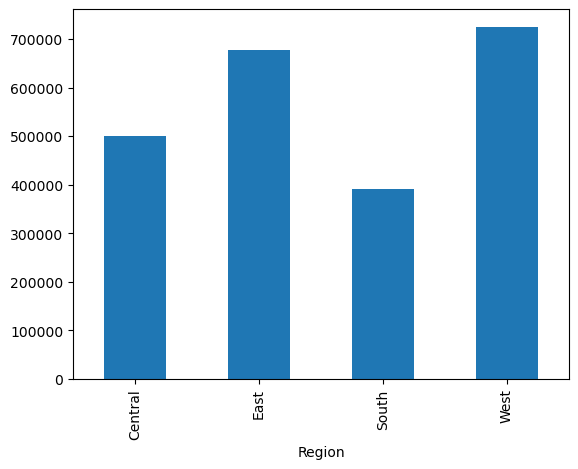

In [10]:
#SALES ANALYSIS
df.groupby("Region")["Sales"].sum().plot.bar()

<AxesSubplot:title={'center':'Profits region-wise'}, xlabel='Region'>

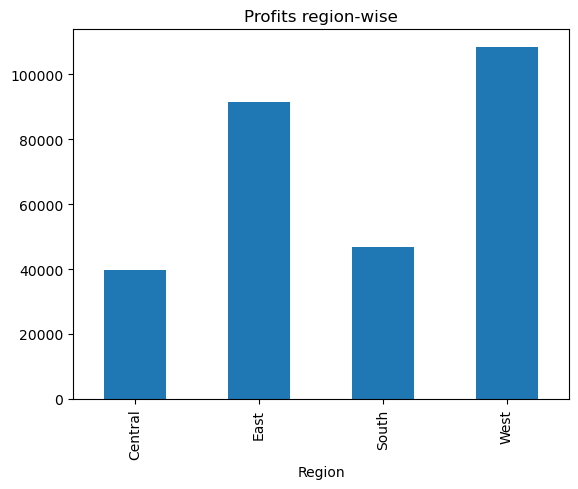

In [121]:
#PROFIT ANALYSIS
df.groupby("Region")["Profit"].sum().plot.bar(title = "Profits region-wise")

<AxesSubplot:ylabel='Profit'>

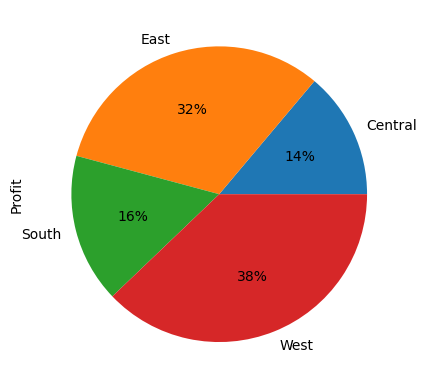

In [12]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot:xlabel='Segment'>

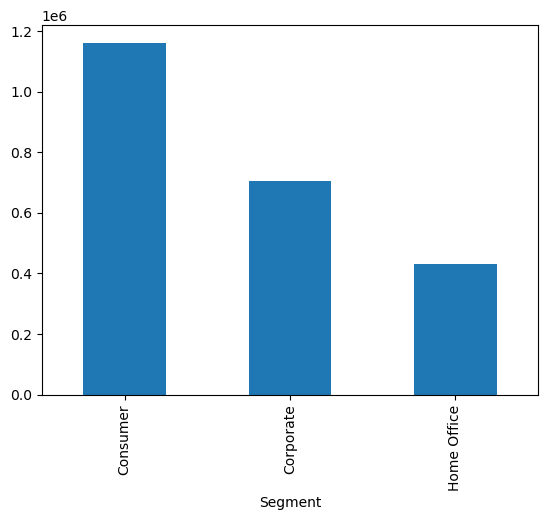

In [13]:
df.groupby("Segment")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='Segment'>

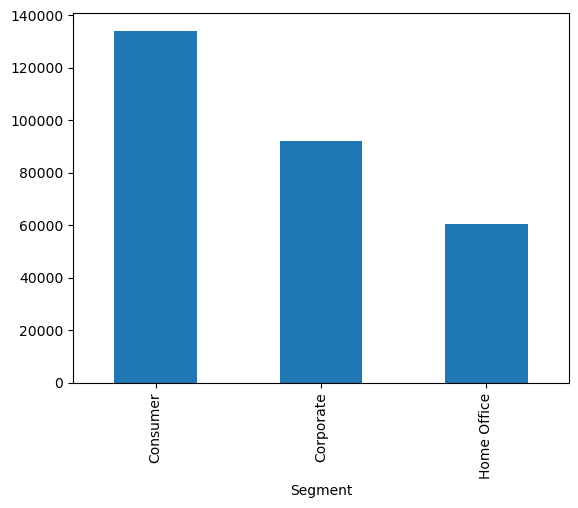

In [14]:
df.groupby("Segment")["Profit"].sum().plot.bar()

<AxesSubplot:xlabel='Category'>

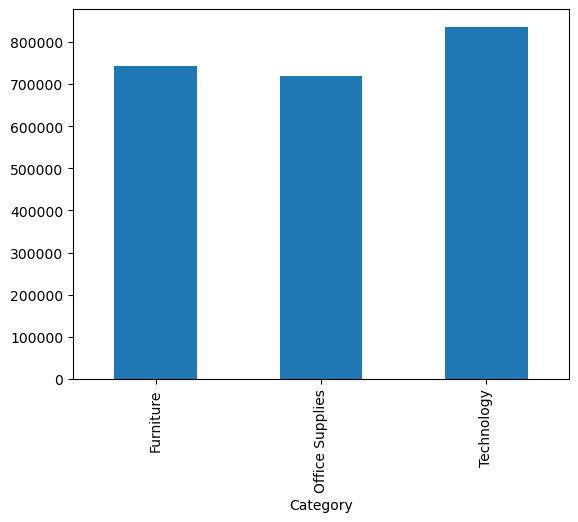

In [15]:
df.groupby("Category")["Sales"].sum().plot.bar()

<AxesSubplot:xlabel='Category'>

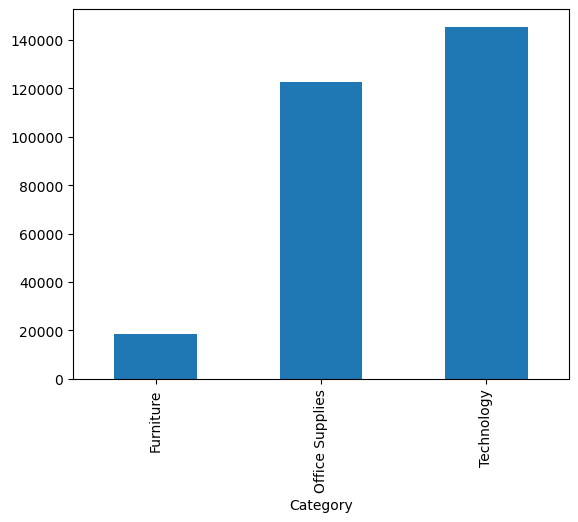

In [16]:
df.groupby("Category")["Profit"].sum().plot.bar()

<AxesSubplot:>

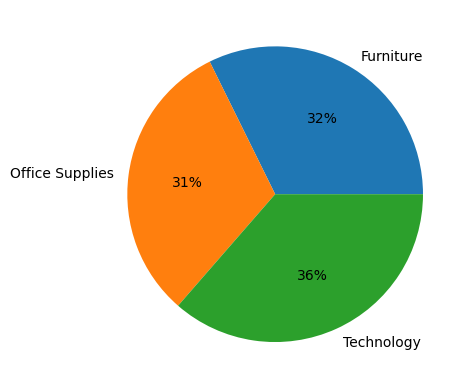

In [48]:
df.groupby("Category")["Sales"].sum().plot.pie(ylabel = "",autopct="%1.0f%%")

<AxesSubplot:title={'center':'Categories profit distribution'}, ylabel='Profit'>

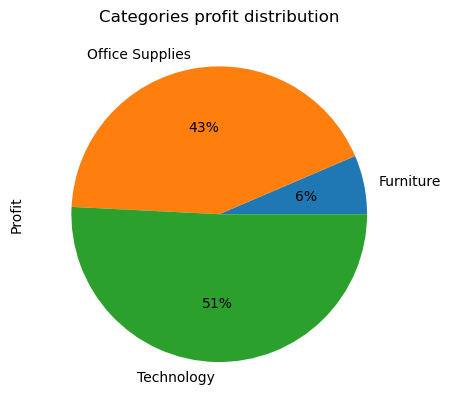

In [120]:
df.groupby("Category")["Profit"].sum().plot.pie(title= "Categories profit distribution",autopct="%1.0f%%")

<AxesSubplot:>

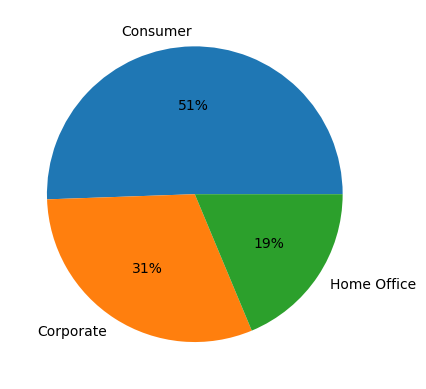

In [136]:
df.groupby("Segment")["Sales"].sum().sort_values(ascending=False).head(10).plot.pie(ylabel="",autopct="%1.0f%%")

<AxesSubplot:>

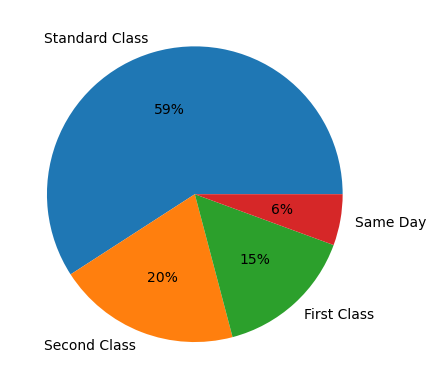

In [137]:
df.groupby("Ship Mode")["Sales"].sum().sort_values(ascending=False).head(10).plot.pie(ylabel="",autopct="%1.0f%%")

<AxesSubplot:xlabel='State'>

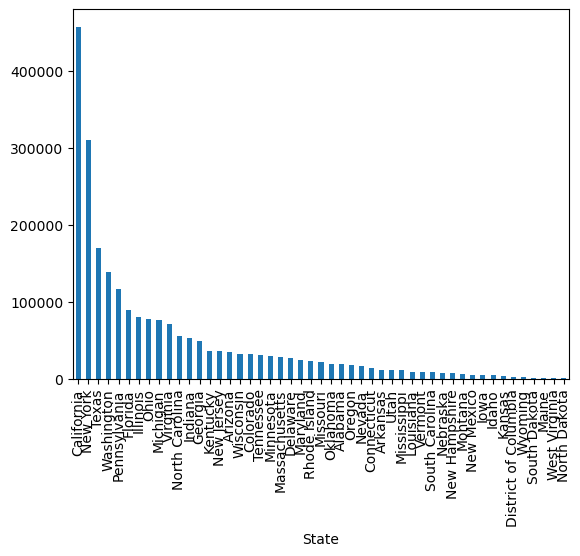

In [38]:
df.groupby("State")["Sales"].sum().sort_values(ascending = False).plot.bar()

<AxesSubplot:xlabel='State'>

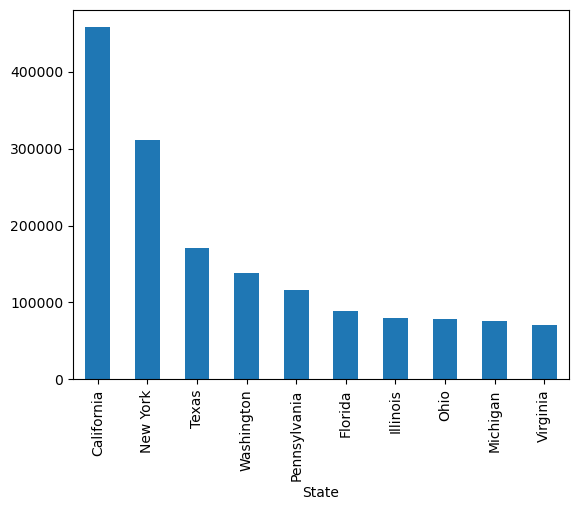

In [45]:
df.groupby("State")["Sales"].sum().sort_values(ascending = False).head(10).plot.bar()

<AxesSubplot:xlabel='State'>

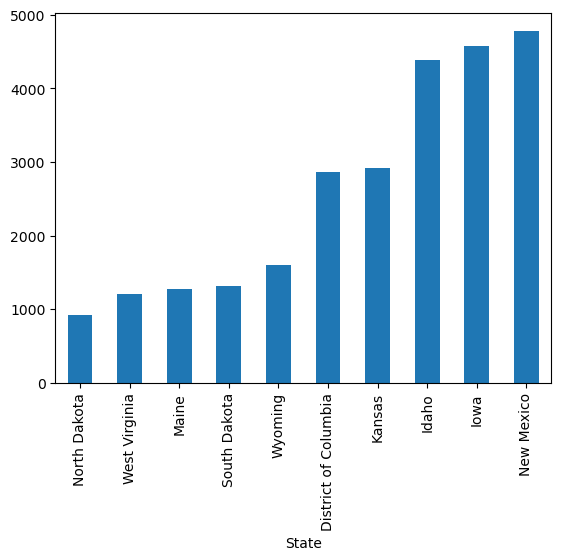

In [47]:
df.groupby("State")["Sales"].sum().sort_values().head(10).plot.bar()

<AxesSubplot:title={'center':'States occuring max losses'}, xlabel='State', ylabel='Loss'>

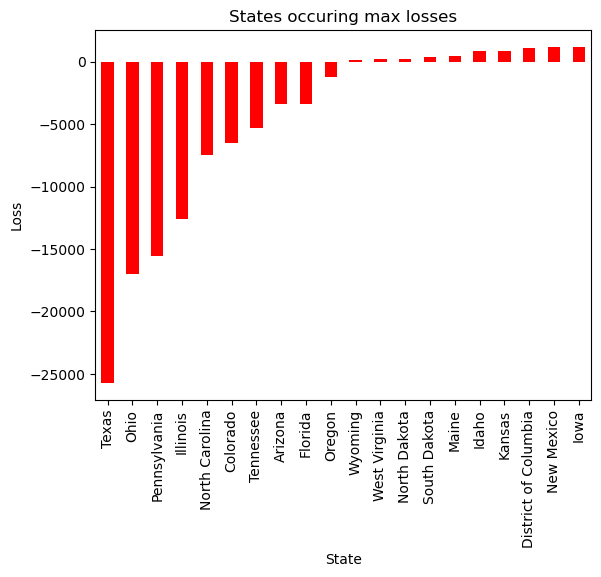

In [138]:
df.groupby("State")["Profit"].sum().sort_values().head(20).plot.bar(color='red',title = "States occuring max losses", ylabel = 'Loss')

<AxesSubplot:title={'center':'States with maximum profit'}, xlabel='State', ylabel='Profit'>

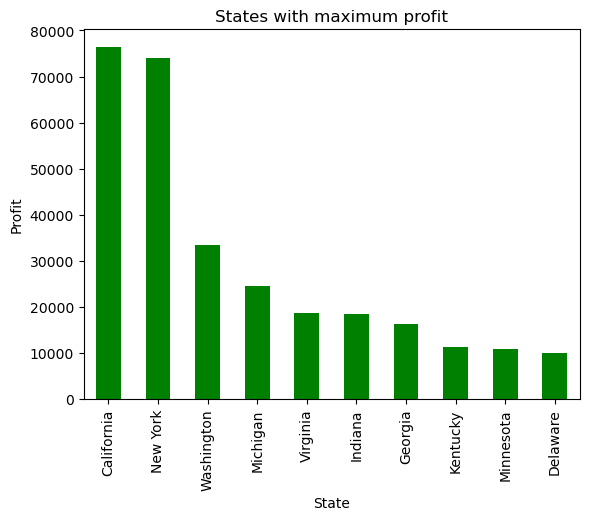

In [32]:
df.groupby("State")["Profit"].sum().sort_values(ascending = False).head(10).plot.bar(title="States with maximum profit",ylabel= "Profit", color = 'green')

<AxesSubplot:title={'center':'City with maximum profit'}, xlabel='City'>

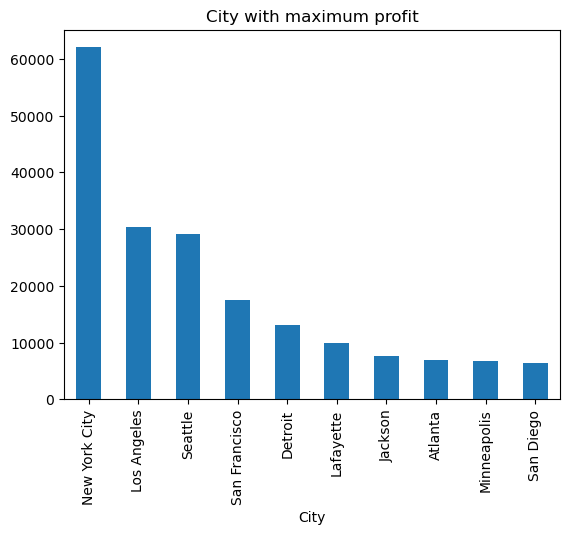

In [141]:
df.groupby("City")["Profit"].sum().sort_values(ascending=False).head(10).plot.bar(title="City with maximum profit")

<AxesSubplot:xlabel='City'>

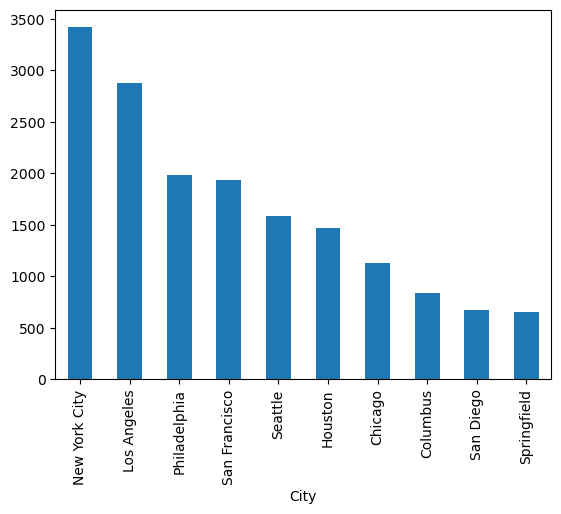

In [63]:
df.groupby("City")["Quantity"].sum().sort_values(ascending=False).head(10).plot.bar()

<AxesSubplot:title={'center':'Profit and Sales based on categories'}, xlabel='Category'>

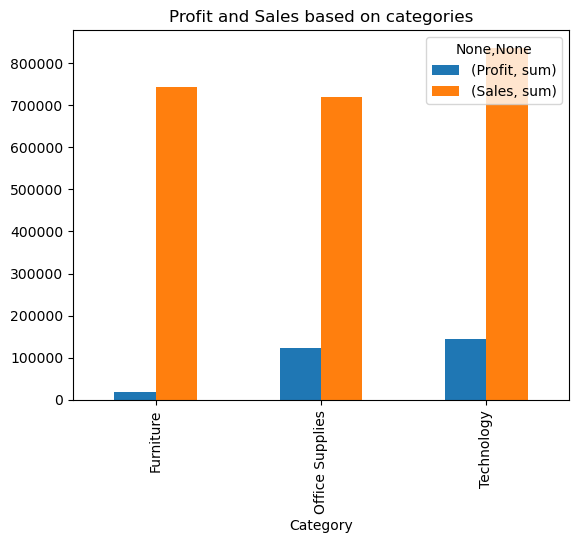

In [139]:
df.groupby("Category")[["Profit","Sales"]].agg(['sum']).plot.bar(title="Profit and Sales based on categories")

<AxesSubplot:xlabel='Sub-Category'>

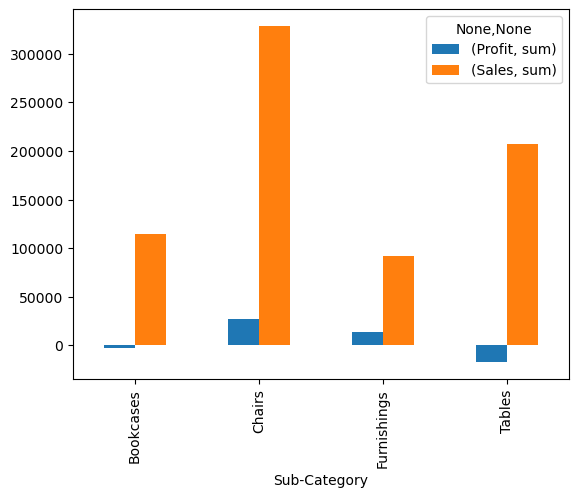

In [140]:
#df.groupby("Category' = 'Furniture')["Profit","Sales"].agg(['sum']).plot.bar()
fur = df[df['Category'] == 'Furniture']
fur.groupby('Sub-Category')[["Profit","Sales"]].agg(['sum']).plot.bar()

<AxesSubplot:xlabel='Sub-Category'>

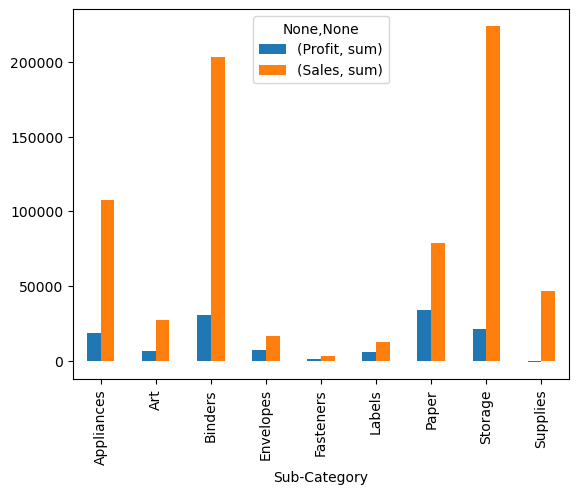

In [125]:
fur = df[df['Category'] == 'Office Supplies']
fur.groupby('Sub-Category')[["Profit","Sales"]].agg(['sum']).plot.bar()

<AxesSubplot:xlabel='Sub-Category'>

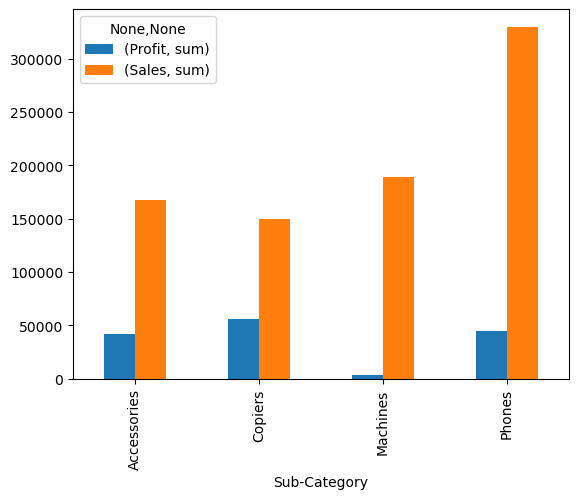

In [116]:
tech = df[df['Category'] == 'Technology']
tech.groupby('Sub-Category')[["Profit","Sales"]].agg(['sum']).plot.bar()